In [128]:
using DSP
using CRC
using Plots

gr()

Plots.GRBackend()

In [129]:
f = 6e6;
τ = 1e-3;
n = τ*f;

The last two words will be replaced with 0V (0x0800) when programmed.

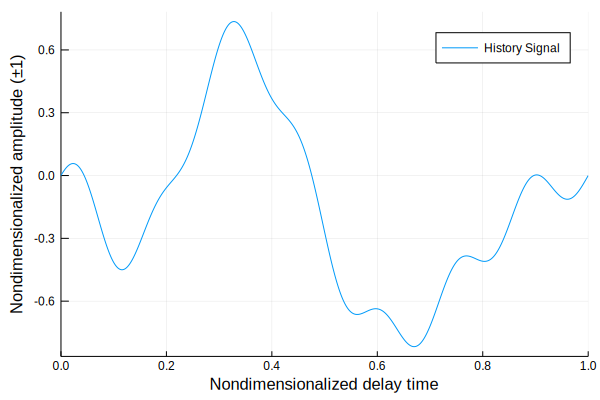

In [130]:
g(t) = 0.9 * (2/π) * sin((sin(t * π/2) + 1) * 3π) * atan(t * 2π) + 0.1 * sin(t * 14π);
ts = (0:n-1) / (n-1);
gs = g.(ts);
plot(ts, gs, xlim=(0, 1),
xlabel = "Nondimensionalized delay time", ylabel = "Nondimensionalized amplitude (±1)", label = "History Signal")

In [131]:
little_endian(x) = UInt8.([x & 0x00FF, x >> 8]);

In [132]:
prog_words = UInt16.(round.(2^(12 - 1) * (1 .+ gs))) .& 0x0FFF;
waveform_file = "./triangle_hist.bin";
write(waveform_file, prog_words)

12000

In [133]:
crc32 = crc(CRC_32);
prog_crc = crc32(vcat(little_endian.(prog_words)...))

0x4b2d933a